<a href="https://colab.research.google.com/github/gurinder2007/AZ-104-MicrosoftAzureAdministrator/blob/master/PCACohort24session1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


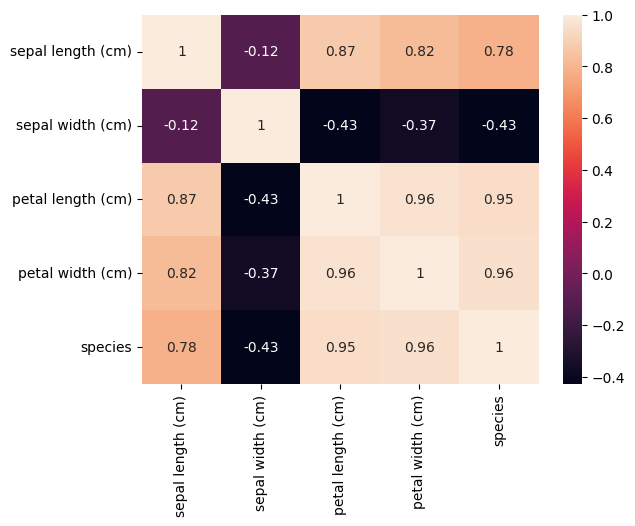

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [ ]:
from sklearn.feature_selection import RFE  #recursive feature elimination
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(random_state = 42)

In [ ]:
rfe = RFE(estimator=model, n_features_to_select=3)
rfe.fit(data.iloc[:,:-1],data['species'])

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=3)

In [ ]:
selected_features = data.columns[:-1][rfe.support_]
print(selected_features)

Index(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'], dtype='object')


In [ ]:
data = pd.DataFrame({'H':[126,128,128,130,130],'W':[78,80,82,82,84],'Gender':['F','F','F','M','M']})

In [ ]:
data.head()

,H,W,Gender
0,126,78,F
1,128,80,F
2,128,82,F
3,130,82,M
4,130,84,M


In [ ]:
numerical_data = data.drop('Gender',axis=1)

In [ ]:
numerical_data

,H,W
0,126,78
1,128,80
2,128,82
3,130,82
4,130,84


In [ ]:
correlation_matrix = numerical_data.corr()
correlation_matrix

,H,W
H,1.000000,0.891042
W,0.891042,1.000000


In [ ]:
centered_data = numerical_data - numerical_data.mean()
centered_data

,H,W
0,-2.4,-3.2
1,-0.4,-1.2
2,-0.4,0.8
3,1.6,0.8
4,1.6,2.8


In [ ]:
covariance_matrix = centered_data.cov()
covariance_matrix

,H,W
H,2.8,3.4
W,3.4,5.2


In [ ]:
centered_data.mean()

,0
H,-5.684342e-15
W,-2.842171e-15


In [ ]:
import numpy as np
eigenvalues,eigenvectors = np.linalg.eig(covariance_matrix)
print("Eigenvalues:")
print(eigenvalues)
print("Eigenvectors:")
print(eigenvectors)

Eigenvalues:
[0.39444872 7.60555128]
Eigenvectors:
[[-0.81633943 -0.57757246]
 [ 0.57757246 -0.81633943]]


In [ ]:
projected_data = centered_data @ eigenvectors
projected_data

,0,1
0,0.110983,3.998460
1,-0.366551,1.210636
2,0.788594,-0.422043
3,-0.844085,-1.577187
4,0.311060,-3.209866


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
iris_df = pd.read_csv('/content/Iris.csv')

In [ ]:
iris_df.head()

,Id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = iris_df.iloc[:,1:5]
scaled_features = scaler.fit_transform(features)
print(scaled_features[:10])

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]
 [-0.53717756  1.95766909 -1.17067529 -1.05003079]
 [-1.50652052  0.80065426 -1.3412724  -1.18150376]
 [-1.02184904  0.80065426 -1.2844067  -1.31297673]
 [-1.74885626 -0.35636057 -1.3412724  -1.31297673]
 [-1.14301691  0.10644536 -1.2844067  -1.4444497 ]]


In [ ]:
n = scaled_features.shape[0]

In [ ]:
n

150

In [ ]:
mean_vector = np.mean(scaled_features,axis=0)
centered_data = scaled_features - mean_vector
cov_matrix = np.cov(centered_data.T)
eigenvalues,eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvalues:")
print(eigenvalues)
print("Eigenvectors:")
print(eigenvectors)

Eigenvalues:
[2.93035378 0.92740362 0.14834223 0.02074601]
Eigenvectors:
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


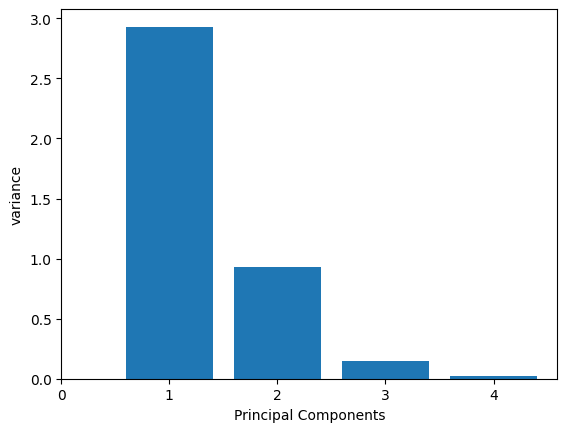

In [ ]:
plt.bar(range(1,5),sorted(eigenvalues,reverse=True))
plt.xticks(np.arange(0,5,1))
plt.xlabel('Principal Components')
plt.ylabel('variance')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca_transformed = pca.fit_transform(scaled_features)

In [ ]:
print(pca_transformed[:10])

[[-2.26454173  0.5057039   0.12194335 -0.02307332]
 [-2.0864255  -0.65540473  0.22725083 -0.10320824]
 [-2.36795045 -0.31847731 -0.05147962 -0.02782523]
 [-2.30419716 -0.57536771 -0.09886044  0.06631146]
 [-2.38877749  0.6747674  -0.02142785  0.03739729]
 [-2.07053681  1.51854856 -0.03068426 -0.00439877]
 [-2.44571134  0.07456268 -0.34219764  0.03809657]
 [-2.23384186  0.24761393  0.08257446  0.02550516]
 [-2.34195768 -1.09514636 -0.1535624   0.02679383]
 [-2.18867576 -0.44862905  0.24655952  0.0399073 ]]


In [ ]:
pca_columns = [f'Principal component {i+1}' for i in range(pca_transformed.shape[1])]
pca_df = pd.DataFrame(data=pca_transformed,columns=pca_columns)
pca_df.head()

,Principal component 1,Principal component 2,Principal component 3,Principal component 4
0,-2.264542,0.505704,0.121943,-0.023073
1,-2.086426,-0.655405,0.227251,-0.103208
2,-2.367950,-0.318477,-0.051480,-0.027825
3,-2.304197,-0.575368,-0.098860,0.066311
4,-2.388777,0.674767,-0.021428,0.037397


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
labels = iris_df['species']
X_train,X_test,y_train,y_test = train_test_split(pca_transformed,labels,test_size=0.2,random_state=42)

In [ ]:
X_train_pca = X_train[:,:2]
X_test_pca = X_test[:,:2]

In [ ]:
lg = LogisticRegression()
lg.fit(X_train_pca,y_train)
y_pred = lg.predict(X_test_pca)
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9


In [ ]:
# 5.1	3.5	1.4	0.2
new_data = np.array([[5.1,3.5,1.4,0.2]])
new_data_scaled = scaler.transform(new_data)
new_data_pca = pca.transform(new_data_scaled)
new_data_pca = new_data_pca[:,:2]
predicted_species = lg.predict(new_data_pca)
print(predicted_species)

['Iris-setosa']


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
new_data = pd.DataFrame([[5.1,3.5,1.4,0.2]],columns=iris_df.columns[1:5])
new_scaled_data = scaler.transform(new_data)
new_pca_data = pca.transform(new_scaled_data)
new_pca_data = new_pca_data[:,:2]
predicted_species = lg.predict(new_pca_data)
print(predicted_species)

['Iris-setosa']


In [ ]:
new_prediction_proba = lg.predict_proba(new_pca_data)
print(new_prediction_proba)

[[9.81130235e-01 1.88693040e-02 4.61049210e-07]]


In [ ]:
formatted_prob = np.round(new_prediction_proba,2)
print(formatted_prob)

[[0.98 0.02 0.  ]]


In [ ]:
df = pd.DataFrame({'H':[126,128,128,130,130],'W':[78,80,82,82,84]})

In [ ]:
df.head()

,H,W
0,126,78
1,128,80
2,128,82
3,130,82
4,130,84


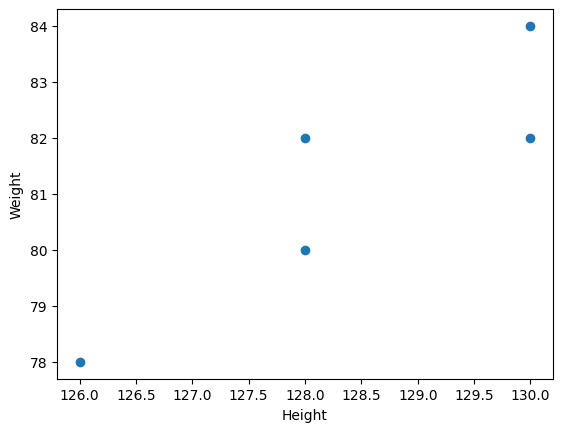

In [ ]:
plt.plot(df['H'],df['W'],'o')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['H_N'] = scaler.fit_transform(df[['H']])
df['W_N'] = scaler.fit_transform(df[['W']])

In [ ]:
df.head()

,H,W,H_N,W_N
0,126,78,-1.603567,-1.568929
1,128,80,-0.267261,-0.588348
2,128,82,-0.267261,0.392232
3,130,82,1.069045,0.392232
4,130,84,1.069045,1.372813


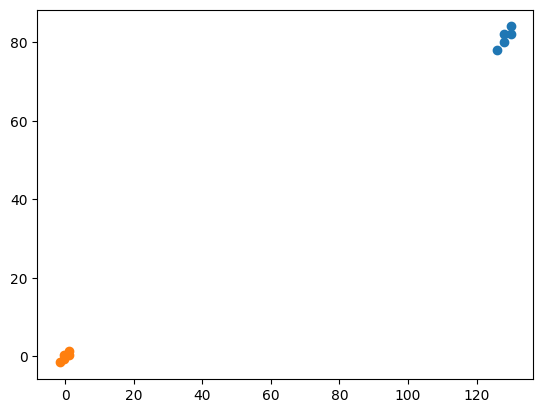

In [ ]:
plt.plot(df['H'],df['W'],'o')
plt.plot(df['H_N'],df['W_N'],'o')
plt.show()